<a href="https://colab.research.google.com/github/aidanjwest/Digital-Humanities-Project.-/blob/main/Manuel_Labour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt install libpangocairo-1.0 libxml2 libblas3 liblapack3 python3-dev python3-pip
import os
! pip3 install kraken
!pip install pdf2image
from pdf2image import convert_from_path
!apt-get install poppler-utils
from pdf2image.exceptions import (
    PDFInfoNotInstalledError,
    PDFPageCountError,
    PDFSyntaxError)
import glob

**This colab file transcibes the contents of the artificially created training data (html file), and blurs them (in order to more closely resemble the desired FCO files). Then it trains the model using that training data. The results are tested in the final few lines of code, using a FCO file from a different period.**

In [ ]:
!pip install pillow
import numpy as np

In [ ]:
from PIL import Image, ImageFilter

In [ ]:
!ketos transcribe -o More_Modelling.html '/content/sample_data/New_Folder/ac3c5508-dafc-47fa-9170-359115beccbe-01.png' '/content/sample_data/New_Folder/ac3c5508-dafc-47fa-9170-359115beccbe-02.png' '/content/sample_data/New_Folder/ac3c5508-dafc-47fa-9170-359115beccbe-03.png' '/content/sample_data/New_Folder/ac3c5508-dafc-47fa-9170-359115beccbe-04.png' '/content/sample_data/New_Folder/ac3c5508-dafc-47fa-9170-359115beccbe-05.png' '/content/sample_data/New_Folder/ac3c5508-dafc-47fa-9170-359115beccbe-06.png' '/content/sample_data/New_Folder/ac3c5508-dafc-47fa-9170-359115beccbe-07.png' '/content/sample_data/New_Folder/ac3c5508-dafc-47fa-9170-359115beccbe-08.png' '/content/sample_data/New_Folder/ac3c5508-dafc-47fa-9170-359115beccbe-09.png' '/content/sample_data/New_Folder/ac3c5508-dafc-47fa-9170-359115beccbe-10.png' '/content/sample_data/New_Folder/ac3c5508-dafc-47fa-9170-359115beccbe-11.png' '/content/sample_data/New_Folder/ac3c5508-dafc-47fa-9170-359115beccbe-12.png' '/content/sample_data/New_Folder/ac3c5508-dafc-47fa-9170-359115beccbe-13.png' '/content/sample_data/New_Folder/ac3c5508-dafc-47fa-9170-359115beccbe-14.png' '/content/sample_data/New_Folder/ac3c5508-dafc-47fa-9170-359115beccbe-15.png' '/content/sample_data/New_Folder/ac3c5508-dafc-47fa-9170-359115beccbe-16.png' '/content/sample_data/New_Folder/ac3c5508-dafc-47fa-9170-359115beccbe-17.png' '/content/sample_data/New_Folder/ac3c5508-dafc-47fa-9170-359115beccbe-18.png' '/content/sample_data/New_Folder/ac3c5508-dafc-47fa-9170-359115beccbe-19.png' '/content/sample_data/New_Folder/ac3c5508-dafc-47fa-9170-359115beccbe-20.png' '/content/sample_data/New_Folder/ac3c5508-dafc-47fa-9170-359115beccbe-21.png' '/content/sample_data/New_Folder/ac3c5508-dafc-47fa-9170-359115beccbe-22.png' '/content/sample_data/New_Folder/ac3c5508-dafc-47fa-9170-359115beccbe-23.png' '/content/sample_data/New_Folder/ac3c5508-dafc-47fa-9170-359115beccbe-24.png' '/content/sample_data/New_Folder/ac3c5508-dafc-47fa-9170-359115beccbe-25.png' 

2021-04-22 11:29:40.742344: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Reading images  [####################################]  100%          
Writing output✓


In [ ]:
!ketos extract --output '/content/sample_data/Output_Folder' example_modified.html

Reading transcriptions  [####################################]  100%


In [ ]:
!ketos extract --output '/content/sample_data/Output_Folder'  More_Modelling_done.html

Reading transcriptions  [####################################]  100%


Now, some code to perform data augmentation is detailed. This uses the PIL library to blur the training data slightly, so as to resemble the FCO documents more closely. 

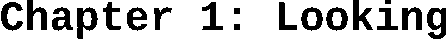

In [ ]:

OriImage = Image.open('/content/sample_data/Output_Folder/000000.png')
OriImage

In [ ]:
new = Image.open('/content/sample_data/New_Folder/002203.png')
new

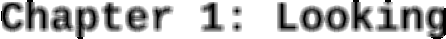

In [ ]:

blurImage = OriImage.filter(ImageFilter.BLUR)
blurImage

In [ ]:
!ketos extract --output '/content/sample_data/New_Folder' example_modified.html
!ketos extract --output '/content/sample_data/New_Folder'  More_Modelling_done.html

Reading transcriptions  [####################################]  100%
Reading transcriptions  [####################################]  100%


In [ ]:
check = glob.glob('/content/sample_data/Output_Folder' + '/*')
print(len(check))

#print(len(images_to_blur))

#check2 = glob.glob('/content/sample_data/New_Folder' + '/*.png')

#print(len(check2))

4624


In [ ]:
blurred_all = glob.glob('/content/sample_data/Output_Folder' + '/*')
print(len(blurred_all))
print(blurred_all[0:10])

blurred_sorted = sorted(blurred_all)
print(blurred_sorted)

print(type(blurred_all), type(blurred_sorted))

4623
['/content/sample_data/Output_Folder/000872.png', '/content/sample_data/Output_Folder/001771.gt.txt', '/content/sample_data/Output_Folder/000275.gt.txt', '/content/sample_data/Output_Folder/000052.png', '/content/sample_data/Output_Folder/000420.gt.txt', '/content/sample_data/Output_Folder/001818.png', '/content/sample_data/Output_Folder/000825.gt.txt', '/content/sample_data/Output_Folder/002085.gt.txt', '/content/sample_data/Output_Folder/000714.png', '/content/sample_data/Output_Folder/000851.png']
['/content/sample_data/Output_Folder/000000.gt.txt', '/content/sample_data/Output_Folder/000000.png', '/content/sample_data/Output_Folder/000001.gt.txt', '/content/sample_data/Output_Folder/000001.png', '/content/sample_data/Output_Folder/000002.gt.txt', '/content/sample_data/Output_Folder/000002.png', '/content/sample_data/Output_Folder/000003.gt.txt', '/content/sample_data/Output_Folder/000003.png', '/content/sample_data/Output_Folder/000004.gt.txt', '/content/sample_data/Output_Fol

In [ ]:
count = 0
for file in blurred_sorted:
  if file.endswith("png"):
    count + 1
    os.rename(file, str(count) + ".png")

  elif file.endswith("txt"):
    count += 1
    os.rename(file, str(count) + ".txt")
  

In [ ]:
images_to_blur = glob.glob('/content/sample_data/Output_Folder' + '/*png')
print(len(images_to_blur))

2311


In [ ]:
tester = images_to_blur[1]
test = Image.open(tester)
test

In [ ]:
for image in images_to_blur:
  ori_image = Image.open(image)
  blur_image = ori_image.filter(ImageFilter.GaussianBlur(radius = 2))

  blur_image.save(image)

The model is then fine-tuned with this blurred training data. 

In [ ]:
! ketos train --resize add -i English_model.mlmodel '/content/sample_data/Output_Folder'/*.png 

2021-04-28 10:29:00.537704: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Building training set  [####################################]  100%          
Building validation set  [####################################]  100%          
[56.8130] alphabet mismatch: chars in training set only: {'+', '#', '=', '|', '}', '[', '*', '?', ']', '&'} (not included in accuracy test during training) 
Network codec not compatible with training set
Adding missing labels to network ✓
stage 1/∞  [####################################]  2079/2079          Accuracy report (1) 0.9957 14979 65
stage 2/∞  [####################################]  2079/2079           Accuracy report (2) 0.9969 14979 47
stage 3/∞  [####################################]  2079/2079           Accuracy report (3) 0.9977 14979 35
stage 4/∞  [####################################]  2079/2079           Accuracy report (4) 0.9976 14979 36
stage 5/∞  [##################

In [ ]:
output_folder3 = '/content/sample_data/Newer_Folder'
pdf_path3 = '/content/FCO_93_428.pdf'
def PDF_to_PNG_conversion3():
  conversion = convert_from_path(pdf_path3, output_folder = output_folder3, fmt = "png")
  
PDF_to_PNG_conversion3()

In [ ]:
for image_file in os.listdir('/content/sample_data/Newer_Folder'):
  with open(image_file + ".txt", 'w') as f:
    f.write("New File")

In [ ]:
images = glob.glob('/content/sample_data/Newer_Folder' + '/*.png')
print(images)
print(len(images))

texts = glob.glob('/content/' + '/*.txt')
print(texts)
print(len(texts))


['/content/sample_data/Newer_Folder/f0326f36-8ffa-42d9-ba34-4c9e001ca13c-14.png', '/content/sample_data/Newer_Folder/f0326f36-8ffa-42d9-ba34-4c9e001ca13c-08.png', '/content/sample_data/Newer_Folder/f0326f36-8ffa-42d9-ba34-4c9e001ca13c-05.png', '/content/sample_data/Newer_Folder/f0326f36-8ffa-42d9-ba34-4c9e001ca13c-15.png', '/content/sample_data/Newer_Folder/f0326f36-8ffa-42d9-ba34-4c9e001ca13c-06.png', '/content/sample_data/Newer_Folder/f0326f36-8ffa-42d9-ba34-4c9e001ca13c-01.png', '/content/sample_data/Newer_Folder/f0326f36-8ffa-42d9-ba34-4c9e001ca13c-12.png', '/content/sample_data/Newer_Folder/f0326f36-8ffa-42d9-ba34-4c9e001ca13c-10.png', '/content/sample_data/Newer_Folder/f0326f36-8ffa-42d9-ba34-4c9e001ca13c-13.png', '/content/sample_data/Newer_Folder/f0326f36-8ffa-42d9-ba34-4c9e001ca13c-03.png', '/content/sample_data/Newer_Folder/f0326f36-8ffa-42d9-ba34-4c9e001ca13c-09.png', '/content/sample_data/Newer_Folder/f0326f36-8ffa-42d9-ba34-4c9e001ca13c-11.png', '/content/sample_data/Newer

The code below test the model, to see if the blurring helped. It did. 

In [ ]:
for pic, text in zip(images, texts):
  !kraken -i $pic $text binarize segment ocr -m Possibly\ Good\ Model\ \(2\).mlmodel

In [ ]:
with open('All_text.txt', 'w') as outfile:
  for fname in texts:
    with open(fname) as infile:
      outfile.write(infile.read())

with open('All_text.txt', 'r') as ting:
  contents = ting.read()
  print(contents)

In [ ]:
with open('All_text.txt', 'w') as outfile:
  for fname in texts:
    with open(fname) as infile:
      outfile.write(infile.read())

with open('All_text.txt', 'r') as ting:
  contents = ting.read()
  print(contents)